In [1]:
from data_loading import load_data
from preprocessing import ligand_umap, cluster_ligand, prot_umap, cluster_ligand_animated
from model_training import train_knn, train_svm, train_logistic, train_mlp
import numpy as np
import pandas as pd

In [2]:
cd ..

/Users/riccardocarpineto/Documents/ADA/ada-2024-project-abrac-adabra


In [3]:
# Load data
filtered_best_ligand_ic50, unique_smiles_df, embeddings = load_data(idea='idea2')

# Reduce dimensionality and preprocess

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/ada/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


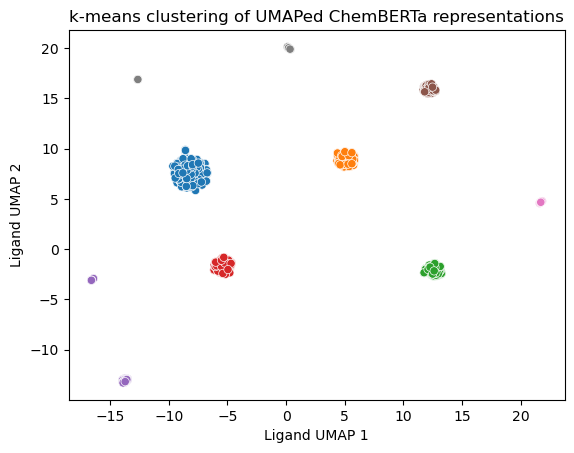

In [4]:
# Preprocess data
n_clusters = 8
merged_umap_df = ligand_umap(unique_smiles_df, embeddings, dimensions = 3,plotting = False,seed = 17)
merged_umap_df = cluster_ligand(merged_umap_df, n_clusters = n_clusters)

In [5]:
protein_ligand_matched = prot_umap(filtered_best_ligand_ic50, merged_umap_df, dimensions = 3, n_clusters = n_clusters)

NameError: name 'torch' is not defined

# Train models

In [6]:
X_prot = np.array([np.squeeze(x) for x in protein_ligand_matched['ESM2 Embedding']])
y = protein_ligand_matched['Ligand class']

cv = 2
# Train models
knn_gscv = train_knn(X_prot, y,cv = cv);
svm_clf = train_svm(X_prot, y,cv = cv);
ll_gscv = train_logistic(X_prot, y,cv = cv);
#mlp_clf = train_mlp(X_prot, y,num_layers = 2, cv = cv);

k-NN: best balanced accuracy of 0.1178, for {'n_neighbors': 9}.
SVM: CV balanced accuracy of 0.1110.
